In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

### 导入数据

In [5]:
df3 = pd.read_excel('附件.xlsx',sheet_name='表单3')
df3.head()

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN


In [6]:
df4 = pd.read_excel('附件.xlsx',sheet_name='表单4')
df4 = df4.drop(['文物编号','纹饰','颜色','文物采样点'],axis=1)
df4.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
0,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,高钾
1,无风化,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN,高钾
2,无风化,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN,高钾
3,无风化,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36,高钾
4,无风化,61.58,NaN,10.95,7.35,1.77,7.50,2.62,3.27,NaN,NaN,0.94,0.06,NaN,0.47,高钾


In [7]:
df4.shape

(66, 16)

### 【第二题前半问】

### 探索规律

见文件夹图片

### 构建分类模型

#### 划分训练、验证集

In [8]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df4, test_size=0.1, random_state=42)

In [9]:
train.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
12,风化,92.63,NaN,NaN,1.07,NaN,1.98,0.17,3.24,NaN,NaN,0.61,NaN,NaN,NaN,高钾
65,风化,30.39,NaN,0.34,3.49,0.79,3.52,0.86,3.13,39.35,7.66,8.99,0.24,NaN,NaN,铅钡
30,无风化,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN,铅钡
33,风化,33.59,NaN,0.21,3.51,0.71,2.69,NaN,4.93,25.39,14.61,9.38,0.37,NaN,NaN,铅钡
9,无风化,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,NaN,0.04,NaN,NaN,高钾


In [10]:
val.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),类型
54,风化,54.61,NaN,0.30,2.08,1.20,6.50,1.27,0.45,23.02,4.19,4.32,0.30,NaN,NaN,铅钡
62,风化,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN,铅钡
0,无风化,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,高钾
45,风化,16.71,NaN,NaN,1.87,NaN,0.45,0.19,NaN,70.21,6.69,1.77,0.68,NaN,NaN,铅钡
5,无风化,67.65,NaN,7.37,NaN,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,NaN,NaN,高钾


#### 数据预处理

In [13]:
def fill_missing_value(data):
    filled_data = data.copy()
    cols = list(filled_data.columns)
    for col in cols:
        filled_data[col] = filled_data[col].fillna(0)
    return filled_data

def filter_invalid_data(data):
    filtered_data = data.copy()
    cols = list(filtered_data.columns)
    filtered_data['Total'] = filtered_data[cols[1:15]].sum(axis=1)
    filtered_data = filtered_data[(filtered_data['Total'] >= 85) & (filtered_data['Total'] <= 105)]
    return filtered_data
    
def rename_data(data):
    renamed_data = data.copy()
    renamed_data['表面风化'][renamed_data['表面风化'] == '无风化'] = 0
    renamed_data['表面风化'][renamed_data['表面风化'] == '风化'] = 1
    renamed_data = renamed_data.rename(columns={'表面风化':'weathering', 
                              '二氧化硅(SiO2)':'SiO2', 
                              '氧化钠(Na2O)':'Na2O',
                              '氧化钾(K2O)':'K2O',
                              '氧化钙(CaO)':'CaO',
                              '氧化镁(MgO)':'MgO',
                              '氧化铝(Al2O3)':'Al2O3',
                              '氧化铁(Fe2O3)':'Fe2O3',
                              '氧化铜(CuO)':'CuO',
                              '氧化铅(PbO)':'PbO',
                              '氧化钡(BaO)':'BaO',
                              '五氧化二磷(P2O5)':'P2O5',
                              '氧化锶(SrO)':'SrO',
                              '氧化锡(SnO2)':'SnO2',
                              '二氧化硫(SO2)':'SO2'})
    return renamed_data

def process_data_gm(data, pipeline_functions):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    return data

def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

In [14]:
def process_data_fm(data):
    X = data
    X = process_data_gm(X, [
                            (fill_missing_value, None, None),
                            (filter_invalid_data, None, None),
                            (rename_data, None, None),
                            (select_columns, [# Binary Features
                                              'weathering',
                                              # Numerical Features
                                              'SiO2',
                                              'Na2O',
                                              'K2O',
                                              'CaO',
                                              'MgO',
                                              'Al2O3',
                                              'Fe2O3',
                                              'CuO',
                                              'PbO',
                                              'BaO',
                                              'P2O5',
                                              'SrO',
                                              'SnO2',
                                              'SO2'], None)])
    return X

#### 网格搜索寻找超参数

In [15]:
tr = train.copy()
tr['类型'][tr['类型'] == '高钾'] = 'K'
tr['类型'][tr['类型'] == '铅钡'] = 'PbBa'
tr = tr.rename(columns={'类型':'type'})
tr.head()

,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),type
12,风化,92.63,NaN,NaN,1.07,NaN,1.98,0.17,3.24,NaN,NaN,0.61,NaN,NaN,NaN,K
65,风化,30.39,NaN,0.34,3.49,0.79,3.52,0.86,3.13,39.35,7.66,8.99,0.24,NaN,NaN,PbBa
30,无风化,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN,PbBa
33,风化,33.59,NaN,0.21,3.51,0.71,2.69,NaN,4.93,25.39,14.61,9.38,0.37,NaN,NaN,PbBa
9,无风化,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,NaN,0.04,NaN,NaN,K


In [16]:
from sklearn.model_selection import GridSearchCV
def model_finder_function(phi_function, model, params):
    y_train = tr.copy()['type']
    X_train = phi_function(tr.copy())
    model_finder = GridSearchCV(estimator = model,
                                param_grid = params,
                                scoring = "accuracy",
                                cv = 5,
                                n_jobs = -1)
    model_finder.fit(X_train, y_train)
    print("Best Model: ", model_finder.best_estimator_)
    print("Mean Accuracy of Best Model: ", model_finder.best_score_)

In [17]:
from sklearn.ensemble import RandomForestClassifier
max_depth = [5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 5, 10]

params_group = {'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf':min_samples_leaf}

random_forest_finded_model = model_finder_function(process_data_fm, RandomForestClassifier(random_state = 0), params_group)

Best Model:  RandomForestClassifier(max_depth=5, random_state=0)
Mean Accuracy of Best Model:  1.0


#### 训练和验证

##### 评价函数

In [18]:
def evaluation_metrics(df):
    df_cp = df.copy()
    TP = len(df_cp[(df_cp['type'] == 'PbBa') & (df_cp['type_predict'] == 'PbBa')])
    FP = len(df_cp[(df_cp['type'] == 'K') & (df_cp['type_predict'] == 'PbBa')])
    FN = len(df_cp[(df_cp['type'] == 'PbBa') & (df_cp['type_predict'] == 'K')])
    TN = len(df_cp[(df_cp['type'] == 'K') & (df_cp['type_predict'] == 'K')])
    acc = (TP + TN) / (TP + FP + FN + TN)
    print("Accuracy: ", acc)
    precision = TP / (TP + FP)
    print("Precision: ", precision)
    recall = TP / (TP + FN)
    print("Recall: ", recall)
    False_alarm_rate = FP / (FP + TN)
    print("False Alarm Rate: ", False_alarm_rate)

In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(df):
    df_cp = df.copy()
    cm = confusion_matrix(df['type'], df['type_predict'])
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})

##### 最终模型

-------------- Training Evaluation Metrics --------------

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
False Alarm Rate:  0.0

-------------- Training Confusion Matrix --------------


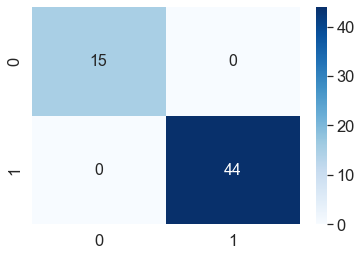

In [20]:
model_fi = RandomForestClassifier(max_depth=5, random_state=0)
train_fi = train.copy()
train_fi['类型'][train_fi['类型'] == '高钾'] = 'K'
train_fi['类型'][train_fi['类型'] == '铅钡'] = 'PbBa'
train_fi = train_fi.rename(columns={'类型':'type'})
y_train_fi = train_fi.copy()['type']
X_train_fi = process_data_fm(train_fi.copy())
model_fi.fit(X_train_fi, y_train_fi)
train_fi['type_predict'] = model_fi.predict(X_train_fi)
print("-------------- Training Evaluation Metrics --------------")
print('')
evaluation_metrics(train_fi)
print('')
print("-------------- Training Confusion Matrix --------------")
plot_confusion_matrix(train_fi)

##### 模型可视化（这边在yat那边跑）

In [21]:
# import os
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import export_graphviz

# # 系统环境变量添加Graphviz安装路径，以便下面代码可以用dot命令
# os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin'

# model_fi = RandomForestClassifier(max_depth=5, random_state=0)
# train_fi = train.copy()
# train_fi['类型'][train_fi['类型'] == '高钾'] = 'K'
# train_fi['类型'][train_fi['类型'] == '铅钡'] = 'PbBa'
# train_fi = train_fi.rename(columns={'类型':'type'})
# y_train_fi = train_fi.copy()['type']
# X_train_fi = process_data_fm(train_fi.copy())
# model_fi.fit(X_train_fi, y_train_fi)

# # 循环打印每棵树
# for idx, estimator in enumerate(model_fi.estimators_):
#     # 导出dot文件
#     export_graphviz(estimator,
#                     out_file='tree{}.dot'.format(idx),
#                     feature_names=list(X_train_fi.columns),
#                     class_names=['K','PbBa'],
#                     rounded=True,
#                     proportion=False,
#                     precision=2,
#                     filled=True)
#     # 转换为png文件
#     os.system('dot -Tpng tree{}.dot -o tree{}.png'.format(idx, idx))

结果：图片92

##### 验证

-------------- Validation Evaluation Metrics --------------

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
False Alarm Rate:  0.0

-------------- Validation Confusion Matrix --------------


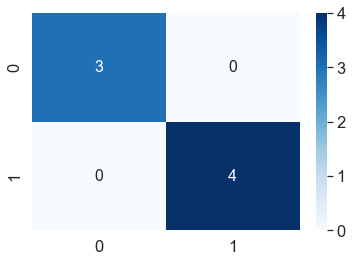

In [22]:
val_fi = val.copy()
val_fi['类型'][val_fi['类型'] == '高钾'] = 'K'
val_fi['类型'][val_fi['类型'] == '铅钡'] = 'PbBa'
val_fi = val_fi.rename(columns={'类型':'type'})
y_val_fi = val_fi.copy()['type']
X_val_fi = process_data_fm(val_fi.copy())
val_fi['type_predict'] = model_fi.predict(X_val_fi)
print("-------------- Validation Evaluation Metrics --------------")
print('')
evaluation_metrics(val_fi)
print('')
print("-------------- Validation Confusion Matrix --------------")
plot_confusion_matrix(val_fi)

### 【第三题】

#### 分类预测

In [23]:
test_predictions = model_fi.predict(process_data_fm(df3.copy()))
df3_with_prediction = df3.copy()
df3_with_prediction['预测类型'] = test_predictions

In [24]:
df3_with_prediction

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),预测类型
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51,K
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN,PbBa
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN,PbBa
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN,PbBa
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN,PbBa
5,A6,风化,93.17,NaN,1.35,0.64,0.21,1.52,0.27,1.73,NaN,NaN,0.21,NaN,NaN,NaN,K
6,A7,风化,90.83,NaN,0.98,1.12,NaN,5.06,0.24,1.17,NaN,NaN,0.13,NaN,NaN,0.11,K
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26,PbBa


#### 敏感性分析（整体随机扰动：选50个点放大，50个点缩小）

In [43]:
df3_jittered = process_data_fm(df3.copy())
df3_jittered

,weathering,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
1,1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
2,0,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
3,0,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
4,1,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00
5,1,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00
6,1,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11
7,0,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


In [44]:
col_list_in = []
row_list_in = []
col_list_de = []
row_list_de = []
import random
for i in range(50):
    col_list_in.append(random.randint(1,14))
    row_list_in.append(random.randint(0,7))
for i in range(50):
    col_list_de.append(random.randint(1,14))
    row_list_de.append(random.randint(0,7))
tuple_list_in = list(zip(row_list_in, col_list_in))
tuple_list_de = list(zip(row_list_de, col_list_de))

In [45]:
for coordinate in tuple_list_in:
    if coordinate[1] == 1 or coordinate[1] == 9:
        df3_jittered.iloc[coordinate] = df3_jittered.iloc[coordinate] * 1.07
    else:
        df3_jittered.iloc[coordinate] = df3_jittered.iloc[coordinate] * 1.2
for coordinate in tuple_list_de:
    if coordinate[1] == 1 or coordinate[1] == 9:
        df3_jittered.iloc[coordinate] = df3_jittered.iloc[coordinate] / 1.07
    else:
        df3_jittered.iloc[coordinate] = df3_jittered.iloc[coordinate] / 1.2
cols = list(df3_jittered.columns)[1:15]
df3_jittered['total'] = df3_jittered[cols].sum(axis=1)
df3_jittered

,weathering,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,total
0,0,78.450000,0.00,0.000000,5.066667,1.291667,6.025000,2.580000,2.110000,0.000000,0.000000,1.060,0.0250,0.000,0.881280,97.489613
1,1,43.219975,0.00,0.000000,7.630000,0.000000,2.330000,0.000000,0.000000,32.056075,0.000000,17.124,0.0000,0.000,0.000000,102.360050
2,0,31.950000,0.00,1.360000,7.190000,0.675000,2.034722,4.902778,0.210000,39.580000,3.908333,2.680,0.7488,0.000,0.000000,95.239633
3,0,33.149533,0.00,0.790000,2.408333,1.050000,5.891667,6.450000,0.960000,25.979600,8.310000,8.450,0.3360,0.000,0.000000,93.775133
4,1,68.790300,1.44,0.256944,1.640000,1.950000,10.625000,0.810000,0.940000,11.429907,2.592000,0.190,0.2520,0.588,0.000000,101.504151
5,1,99.691900,0.00,1.125000,0.768000,0.210000,1.266667,0.270000,1.730000,0.000000,0.000000,0.210,0.0000,0.000,0.000000,105.271567
6,1,90.830000,0.00,0.980000,1.120000,0.000000,3.513889,0.240000,0.677083,0.000000,0.000000,0.156,0.0000,0.000,0.063657,97.580630
7,0,51.120000,0.00,0.191667,0.890000,0.000000,2.120000,0.000000,9.010000,21.240000,11.340000,1.460,0.4464,0.000,1.883333,99.701400


In [46]:
df3_jittered = df3_jittered.drop(columns={'total'})
df3_jittered_pred = model_fi.predict(df3_jittered)
df3_jittered_pred

array(['K', 'PbBa', 'PbBa', 'PbBa', 'PbBa', 'K', 'K', 'PbBa'],
      dtype=object)